## Amazon Sales Dataset

### INTRODUCTION
This dataset consists more than 1000 of real products with their identification number listed in the Amazon marketplace specifically from the region India. I noticed the region due to the currency used in the dataset is Rupee India. My objective is to clean and prepare the data due to the raw data being very unorganized. I will then move on to finding insights about the data and try to elaborate in the form of visualization.

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read file

df = pd.read_csv("amazon.csv")

### DATA CLEANING & PREPARATION OR DATA PRE-PROCESSING
Before making analyzing the data, it is important to clean and prepare data. The methods used to clean and prepare the data are as listed below:

* Changing Data Types of Columns from object to Floats
* Filling in Missing Information
* Checking For Duplicate Rows
* Splitting Long Strings
* Creating Various New Columns

In [3]:
#Checking first few records

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
#Checking total number of rows and columns

df.shape

(1465, 16)

In [5]:
#Checking column names

df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
#Checking datatypes for each column

df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

their is five features i.e.**discounted_price**, **actual_price**, **discount_percentage** and **rating rating_count** 
that requires to change datatype

In [7]:
#changing datatypes of discounted_price and actual_price

df['discounted_price'] = df['discounted_price'].str.replace("₹","").str.replace(",","").astype("float64")

df['actual_price'] = df['actual_price'].str.replace("₹","").str.replace(",","").astype("float64")


In [8]:
#changing datatype of discounted_percentage and values in discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace("%","").astype("float64")/100

df['discount_percentage']


0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1465, dtype: float64

In [9]:
#Checking null values for each column

df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

we have 2 null values in rating count let's see

In [10]:
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


this is the 2 records in which rating count is NaN because with respect to this records only one time rating is given that's 
why rating feature has missing value in this case we can not remove this records instead we can fill this with 0 value because
this records having only one rating count.

In [11]:
#Replacing missing values in rating_count

df['rating_count'].fillna(0 , inplace = True)


In [12]:
#Checking rating_count after raplacing NaN

df['rating_count'].isnull().sum()


0

In [13]:
#Changing datatype of rating_count after raplacing comma

df['rating_count'] = df['rating_count'].str.replace(",","").astype("float64")


In [14]:
#checking rating feature

df['rating'].unique()


array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

Encountered with unusual string '|' in the rating feature

In [15]:
#Inspecting the strange row

df.query('rating == "|"')

#Another way to get record
#df[df['rating'] == "|"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


* Before replacing this string first inspect this product.
* So I went to amazon page to find out is their any rating regarding this product with product_id **B08L12N5H1** and found out
  that it has rating of **4.0**.
* So I am going to give the item rating a 4.0 as well.

source : https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1

In [16]:
#Giving item rating of 4.0 to product_id B08L12N5H1

df['rating'] = df['rating'].str.replace('|' ,'4.0').astype("float64")

In [17]:
#Checking for duplicate records

# Selecting duplicate rows except first
# occurrence based on all columns

duplicate_records = df[df.duplicated()]

duplicate_records


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


So their is no duplicate records we have in this dataset so we are good to go to next phase.

In [18]:
#Creating a new DataFrame with Selected Column

df1 = df[['product_id' , 'product_name' , 'category' , 'discounted_price' , 'actual_price' , 'discount_percentage' , 'rating' , 'rating_count']]

df1.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0


In [19]:
#Splitting the Strings in the category column

category_split = df['category'].str.split('|' , expand = True)

category_split.head()


,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None


In [20]:
#Checking null percentage of each feature of category

(category_split.isnull().sum())/len(category_split)


0    0.000000
1    0.000000
2    0.005461
3    0.112628
4    0.643686
5    0.941980
6    0.991126
dtype: float64

we can drop 4,5 and 6 column 

In [21]:

category_drop = category_split.drop([4,5,6] , axis = 1)

category_drop.head()


,0,1,2,3
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables


In [22]:
category_drop.isnull().sum()

0      0
1      0
2      8
3    165
dtype: int64

We can drop 3 column right now because it takes lot of time to get the name of products

In [23]:

category_drop = category_drop.drop([3] , axis = 1)

category_drop.head()


,0,1,2
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories


In [24]:
#Rename columns

category_drop = category_drop.rename(columns = {0:'category_1' , 1:'category_2' , 2:'category_3'})

category_drop.head(2)


,category_1,category_2,category_3
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories


In [25]:
category_drop.isnull().sum()

category_1    0
category_2    0
category_3    8
dtype: int64

In [26]:
#Adding these categories to df1

df1['category_1'] = category_drop['category_1']
df1['category_2'] = category_drop['category_2']



In [27]:
df1.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,Computers&Accessories,Accessories&Peripherals


Now we can drop category column

In [28]:

df1 = df1.drop('category' , axis=1)

df1.head(2)


,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers&Accessories,Accessories&Peripherals


In [29]:
#Checking unique category_1

df1['category_1'].unique()


array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [30]:
#Fixing Strings in the Category_1 Column

df1['category_1'] = df1['category_1'].str.replace("&" , ' & ')
df1['category_1'] = df1['category_1'].str.replace("MusicalInstruments" , 'Musical Instruments')
df1['category_1'] = df1['category_1'].str.replace("OfficeProducts" , 'Office Products')
df1['category_1'] = df1['category_1'].str.replace("HomeImprovement" , 'Home Improvement')

df1['category_1'].unique()

array(['Computers & Accessories', 'Electronics', 'Musical Instruments',
       'Office Products', 'Home & Kitchen', 'Home Improvement',
       'Toys & Games', 'Car & Motorbike', 'Health & PersonalCare'],
      dtype=object)

In [31]:
#Checking unique category_2

df1['category_2'].unique()

array(['Accessories&Peripherals', 'NetworkingDevices',
       'HomeTheater,TV&Video', 'HomeAudio', 'WearableTechnology',
       'Mobiles&Accessories', 'Accessories',
       'Headphones,Earbuds&Accessories', 'ExternalDevices&DataStorage',
       'Microphones', 'GeneralPurposeBatteries&BatteryChargers',
       'OfficePaperProducts', 'CraftMaterials', 'Cameras&Photography',
       'OfficeElectronics', 'Printers,Inks&Accessories', 'Monitors',
       'Components', 'Electrical', 'Arts&Crafts', 'PowerAccessories',
       'Tablets', 'Laptops', 'Kitchen&HomeAppliances',
       'Heating,Cooling&AirQuality', 'Kitchen&Dining',
       'HomeStorage&Organization', 'CarAccessories',
       'HomeMedicalSupplies&Equipment'], dtype=object)

In [32]:
##Fixing Strings in Category_2 column

df1['category_2'] = df1['category_2'].str.replace("&"," & ")
df1['category_2'] = df1['category_2'].str.replace("NetworkingDevices","Networking Devices")
df1['category_2'] = df1['category_2'].str.replace("HomeTheater","Home Theater")
df1['category_2'] = df1['category_2'].str.replace("HomeAudio","Home Audio")
df1['category_2'] = df1['category_2'].str.replace("WearableTechnology","Wearable Technology")
df1['category_2'] = df1['category_2'].str.replace("OfficePaperProducts","Office Paper Products")
df1['category_2'] = df1['category_2'].str.replace("CraftMaterials","Craft Materials")
df1['category_2'] = df1['category_2'].str.replace("OfficeElectronics","Office Electronics")
df1['category_2'] = df1['category_2'].str.replace("PowerAccessories","Power Accessories")
df1['category_2'] = df1['category_2'].str.replace("CarAccessories","Car Accessories")
df1['category_2'] = df1['category_2'].str.replace("ExternalDevices","External Devices")
df1['category_2'] = df1['category_2'].str.replace("HomeMedicalSupplies ","Home Medical Supplies")
df1['category_2'] = df1['category_2'].str.replace("GeneralPurposeBatteries","General Purpose Batteries")
df1['category_2'] = df1['category_2'].str.replace("BatteryChargers","BatteryChargers")

df1['category_2'].unique()

array(['Accessories & Peripherals', 'Networking Devices',
       'Home Theater,TV & Video', 'Home Audio', 'Wearable Technology',
       'Mobiles & Accessories', 'Accessories',
       'Headphones,Earbuds & Accessories',
       'External Devices & DataStorage', 'Microphones',
       'General Purpose Batteries & BatteryChargers',
       'Office Paper Products', 'Craft Materials',
       'Cameras & Photography', 'Office Electronics',
       'Printers,Inks & Accessories', 'Monitors', 'Components',
       'Electrical', 'Arts & Crafts', 'Power Accessories', 'Tablets',
       'Laptops', 'Kitchen & HomeAppliances',
       'Heating,Cooling & AirQuality', 'Kitchen & Dining',
       'HomeStorage & Organization', 'Car Accessories',
       'Home Medical Supplies& Equipment'], dtype=object)

In [33]:
# Removing Whitespace from product_id

df1['product_id'].str.strip()

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1465, dtype: object

In [34]:
df1['rating'].unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, 2. , 2.6, 2.9])

In [35]:
#Creating Categories for Rankings

rating_score = []

for i in df1['rating']:
    if i < 2.0:
        rating_score.append('Poor')
    elif i >= 2 and i < 3:
        rating_score.append('Below Average')
    elif i >= 3 and i < 4:
        rating_score.append('Average')
    elif i >= 4 and i < 5:
        rating_score.append('Above Average')
    elif i == 5:
        rating_score.append('Excellent')  
        

#### Created a Rating Category that consists of:
    
1. Score below 2.0 = Poor

2. Score range of 2.0 - 2.9 = Below Average

3. Score range of 3.0 - 3.9 = Average

4. Score Range of 4.0 - 4.9 = Above Average

5. Score of 5.0 = Excellent   

In [36]:
#Adding rating_score feature to df1

df1["rating_score"] = rating_score

df1.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average


In [37]:
df1['rating_score'].dtypes

dtype('O')

In [38]:
#Changing datetype of rating score to category

df1["rating_score"] = df1["rating_score"].astype("category")


In [39]:
df1['rating_score'].dtypes

CategoricalDtype(categories=['Above Average', 'Average', 'Below Average', 'Excellent'], ordered=False)

In [40]:
#Reordered Categories

df1['rating_score'] = df1['rating_score'].cat.reorder_categories(['Below Average' , 'Average' , 'Above Average' , 
                                                                  'Excellent'] , ordered = True)


In [41]:
#Creating Difference of Price Column between Actual Price and Discounted Price

df1['difference_price'] = df1['actual_price'] - df1['discounted_price']


In [42]:
#Result After Cleaning and Preperation after first cleaned dataframe

df1.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average,245.0


In [43]:
#Subsetting Reviewers Identifications

reviewers = df[['user_id' , 'user_name']]

reviewers.head()


,user_id,user_name
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal..."
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ..."
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."


In [44]:
#Splitting user_id column

reviewer_id_split = reviewers['user_id'].str.split(',' , expand = False)

reviewer_id_split.head()


0    [AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...
1    [AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...
2    [AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...
3    [AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...
4    [AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...
Name: user_id, dtype: object

In [45]:
#Making user_id display 1 id per row

reviewer_id_exp = reviewer_id_split.explode()

reviewer_id_clean = reviewer_id_exp.reset_index(drop = True)

reviewer_id_clean.head()

0    AG3D6O4STAQKAY2UVGEUV46KN35Q
1    AHMY5CWJMMK5BJRBBSNLYT3ONILA
2    AHCTC6ULH4XB6YHDY6PCH2R772LQ
3    AGYHHIERNXKA6P5T7CZLXKVPT7IQ
4    AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q
Name: user_id, dtype: object

In [46]:
#Splitting the strings in user_name column

reviewer_name_split = reviewers['user_name'].str.split(',' , expand = False)

reviewer_name_split.head()


0    [Manav, Adarsh gupta, Sundeep, S.Sayeed Ahmed,...
1    [ArdKn, Nirbhay kumar, Sagar Viswanathan, Asp,...
2    [Kunal, Himanshu, viswanath, sai niharka, saqi...
3    [Omkar dhale, JD, HEMALATHA, Ajwadh a., amar s...
4    [rahuls6099, Swasat Borah, Ajay Wadke, Pranali...
Name: user_name, dtype: object

In [47]:
#Making user_name display 1 name per row

reviewer_name_split = reviewer_name_split.explode()

reviewer_name_clean = reviewer_name_split.reset_index(drop = True)

reviewer_name_clean.head()

0             Manav
1      Adarsh gupta
2           Sundeep
3    S.Sayeed Ahmed
4    jaspreet singh
Name: user_name, dtype: object

In [48]:
#Creating 2 Data Frames to be merged

df21 = pd.DataFrame(data = reviewer_id_clean)
df22 = pd.DataFrame(data = reviewer_name_clean)


In [49]:
#Merging the 2 dataframe containing user_id and user_name

df2 = pd.merge(df21 , df22 , left_index=True , right_index=True)


In [50]:
#Final Check for the new dataframe

df2.head()

,user_id,user_name
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh


## Exploratory Data Analysis

In this stage I will try to elaborate my insights through Visualizations, Pivot Tables, and short explanations.

In [51]:
#Setting Visualizatin Style

sns.set_style(style = 'darkgrid')

sns.set_palette(palette = 'icefire')


### Observation 1: Product Category
Below are the list of Main Category and Sub-Category to help determine which sub-category belongs to which main category:

In [52]:
#Creating Pivot Table that counts most occuring subcategory with respect to their main category

main_sub = df1[['category_1','category_2','product_id']]

main_sub = main_sub.rename(columns = {'category_1':'Main Category' , 'category_2':"Sub-Category" , "product-id":"Product-ID"})
                                      
main_sub_pivot = pd.pivot_table(data = main_sub , index = ['Main Category' , 'Sub-Category'] , aggfunc = 'count')
                                      
main_sub_pivot 


product_id
Main Category           Sub-Category                                           
Car & Motorbike         Car Accessories                                       1
Computers & Accessories Accessories & Peripherals                           381
                        Components                                            5
                        External Devices & DataStorage                       18
                        Laptops                                               1
                        Monitors                                              2
                        Networking Devices                                   34
                        Printers,Inks & Accessories                          11
                        Tablets                                               1
Electronics             Accessories                                          14
                        Cameras & Photography                                16
                        General Purpose Batteries & BatteryChargers          14
                        Headphones,Earbuds & Accessories                     66
                        Home Audio                                           16
                        Home Theater,TV & Video                             162
                        Mobiles & Accessories                               161
                        Power Accessories                                     1
                        Wearable Technology                                  76
Health & PersonalCare   Home Medical Supplies& Equipment                      1
Home & Kitchen          Craft Materials                                       7
                        Heating,Cooling & AirQuality                        116
                        HomeStorage & Organization                           16
                        Kitchen & Dining                                      1
                        Kitchen & HomeAppliances                            308
Home Improvement        Electrical                                            2
Musical Instruments     Microphones                                           2
Office Products         Office Electronics                                    4
                        Office Paper Products                                27
Toys & Games            Arts & Crafts                                         1

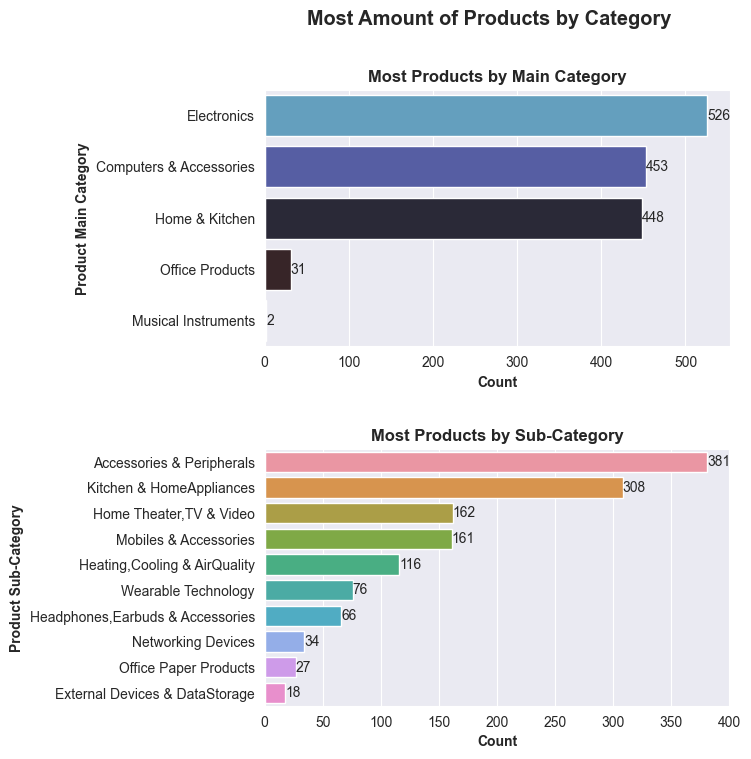

In [53]:
#Most Products by Main Category and Sub-Category

#setup to create multiple plots
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')

#Product Main Category vs Count
sns.countplot(ax = ax[0] , data = df1 , y = "category_1" , order = df1['category_1'].value_counts().iloc[:5].index )

ax[0].set_title("Most Products by Main Category" , size = 12 , fontweight = 'bold')
ax[0].set_ylabel("Product Main Category" , size = 10 , fontweight = 'bold')
ax[0].set_xlabel("Count" , size = 10 , fontweight = 'bold')

#Making horizontal space between plots
plt.subplots_adjust(hspace = 0.4)

#Product Sub_Category vs Count
sns.countplot(ax = ax[1] , data = df1 , y = "category_2" , order = df1['category_2'].value_counts().iloc[:10].index )

ax[1].set_title("Most Products by Sub-Category" , size = 12 , fontweight = 'bold')
ax[1].set_ylabel("Product Sub-Category" , size = 10 , fontweight = 'bold')
ax[1].set_xlabel("Count" , size = 10 , fontweight = 'bold')

#Datalabels
ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])


plt.show()


**Electronics,Computers & Accessories	especially acccessories & peripherals and kitchen & home appliances** covers most of the products in this dataset. In general, this dataset contains mostly products closely related to electric devices.

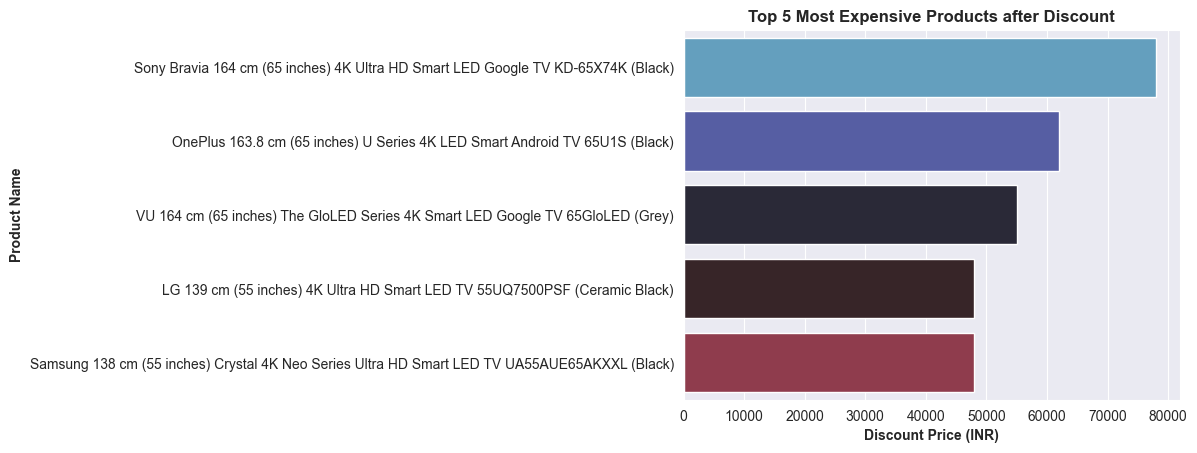

In [54]:
#Top 5 Products most expensive products after discount

exp_prod_disc = sns.barplot(data = df1.sort_values("discounted_price" , ascending=False).head(5) , x = 'discounted_price' , y = 'product_name')

exp_prod_disc.set_title("Top 5 Most Expensive Products after Discount" , fontweight = 'bold')
exp_prod_disc.set_xlabel("Discount Price (INR)" , fontweight = 'bold')
exp_prod_disc.set_ylabel("Product Name" , fontweight = 'bold')

plt.show()


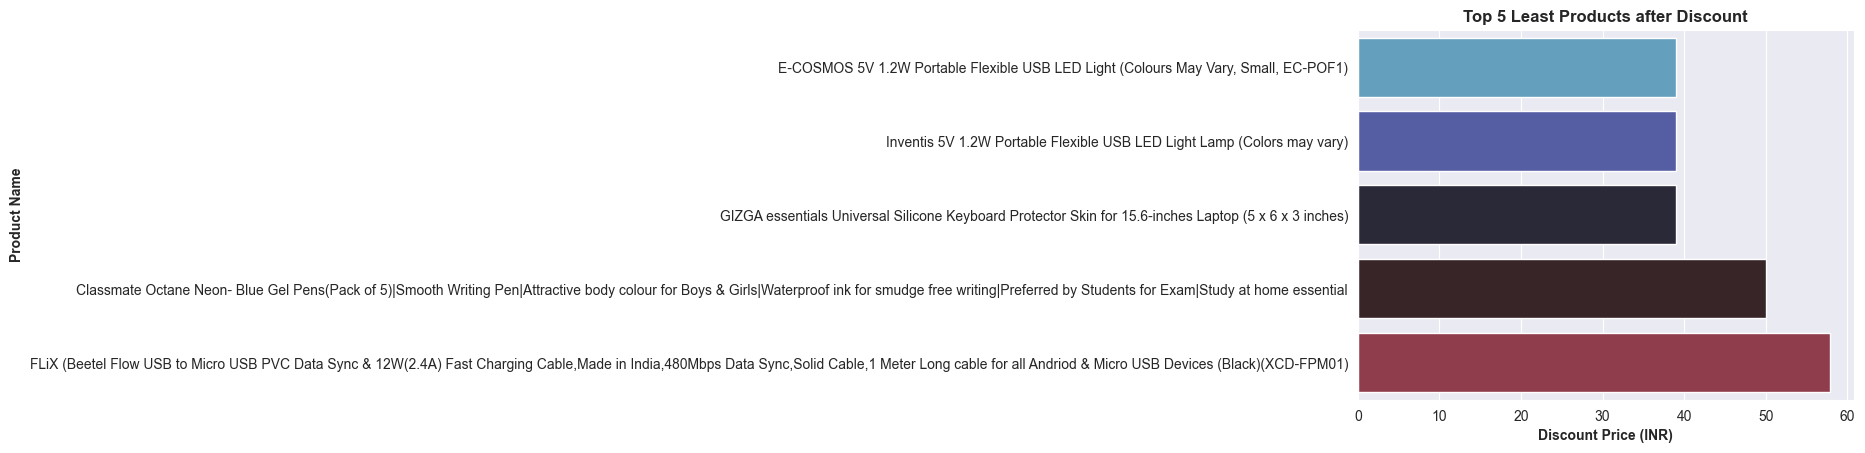

In [55]:
#Top 5 Least products after discount

cheap_prod_disc = sns.barplot(data = df1.sort_values("discounted_price").head(5) , x = 'discounted_price' , y = 'product_name')

cheap_prod_disc.set_title("Top 5 Least Products after Discount" , fontweight = 'bold')
cheap_prod_disc.set_xlabel("Discount Price (INR)" , fontweight = 'bold')
cheap_prod_disc.set_ylabel("Product Name" , fontweight = 'bold')

plt.show()

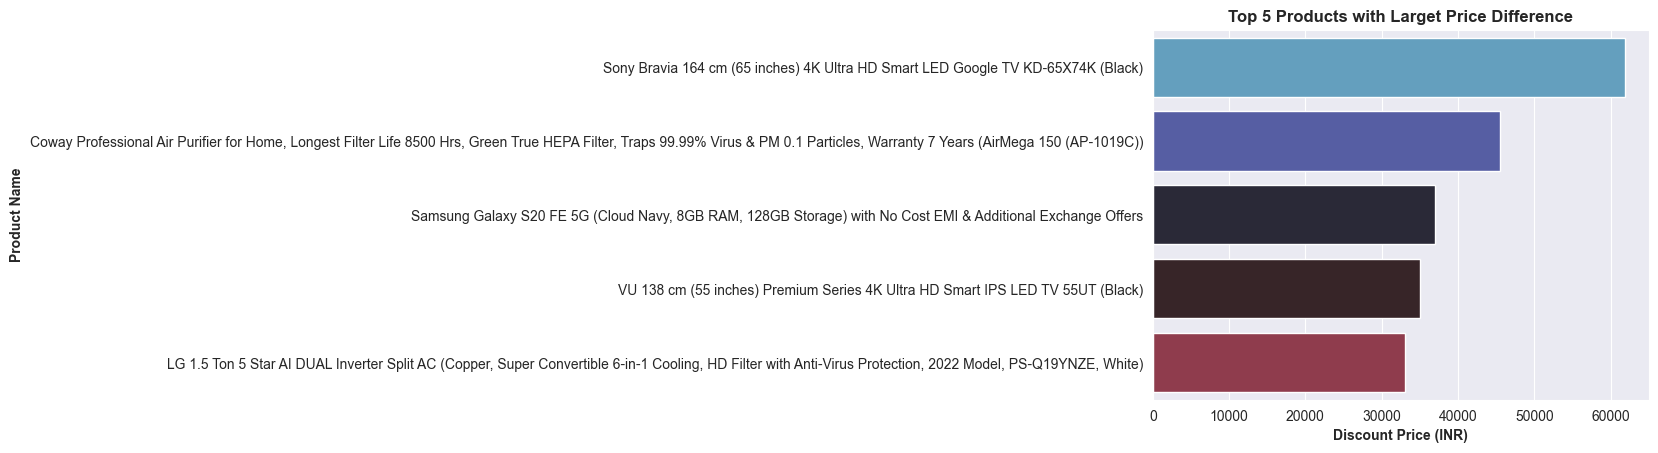

In [56]:
#Top 5 Products with the largest difference in price due to discount

diff_prod_disc = sns.barplot(data = df1.sort_values("difference_price" , ascending=False).head(5) , x = 'difference_price' , y = 'product_name')

diff_prod_disc.set_title("Top 5 Products with Larget Price Difference" , fontweight = 'bold')
diff_prod_disc.set_xlabel("Discount Price (INR)" , fontweight = 'bold')
diff_prod_disc.set_ylabel("Product Name" , fontweight = 'bold')

plt.show()

### Observation 2: Correlation Between Features

In [57]:
df1.corr()

,discounted_price,actual_price,discount_percentage,rating,rating_count,difference_price
discounted_price,1.000000,0.961915,-0.242412,0.120365,-0.027261,0.763683
actual_price,0.961915,1.000000,-0.118098,0.121695,-0.036137,0.911069
discount_percentage,-0.242412,-0.118098,1.000000,-0.154924,0.011691,0.086675
rating,0.120365,0.121695,-0.154924,1.000000,0.102318,0.105889
rating_count,-0.027261,-0.036137,0.011691,0.102318,1.000000,-0.044234
difference_price,0.763683,0.911069,0.086675,0.105889,-0.044234,1.000000


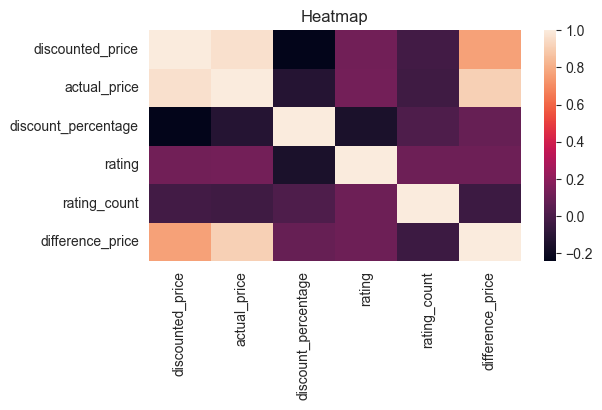

In [58]:
#Correlation in visualized way

fig, ax = plt.subplots(figsize = ( 6,3))

sns.heatmap(data = df1.corr())
ax.set_title("Heatmap")

plt.show()

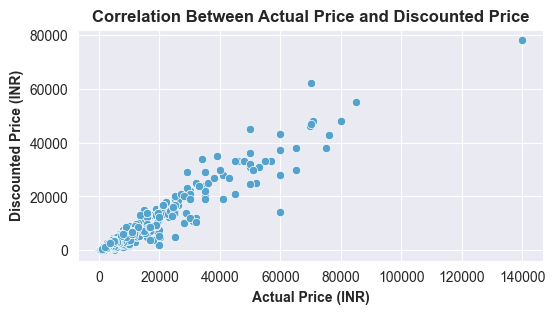

In [59]:

fig, ax = plt.subplots(figsize = ( 6 , 3 ))

sns.scatterplot(data = df1 , x = 'actual_price' , y = 'discounted_price')

ax.set_title("Correlation Between Actual Price and Discounted Price" , fontweight = 'bold')
ax.set_xlabel("Actual Price (INR)" , fontweight = 'bold')
ax.set_ylabel("Discounted Price (INR)" , fontweight = 'bold')

plt.show()

So we can see that the **actual prices of products and discounted prices of products have a** ***Positive correlation***

### Observation 3: Product Ratings

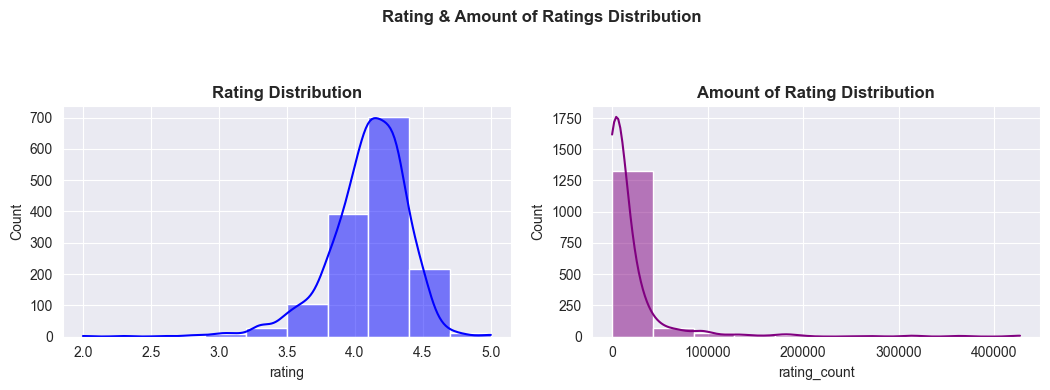

In [60]:
#Rating and Rating Count Distribustion through histogram

fig ,ax = plt.subplots(1, 2 , figsize = (11,4))

fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy')

fig.tight_layout(pad=3.0)

sns.histplot(ax =ax[0] ,data = df1  , x = 'rating' , bins = 10 , color = 'blue' , kde = True)
ax[0].set_title('Rating Distribution' , fontweight = 'bold')

sns.histplot(ax =ax[1] ,data = df1  , x = 'rating_count' , bins = 10 , color = 'purple' , kde = True)
ax[1].set_title('Amount of Rating Distribution' , fontweight = 'bold')


plt.show()

Most of the product rating range around **4.0 - 4.375** with **no products under the score of 2.0**. The rating distribution is slightly left-skewed or we can say that **negative skewed distribution**.

The amount of ratings given to a product is very widespread. Most of the products that have been rated, have around **0 - 5000 amount** of rating for each product. Interestingly there are products that have **more than 40,000 ratings**. The amount of ratings distribution is **highly right skewed**.

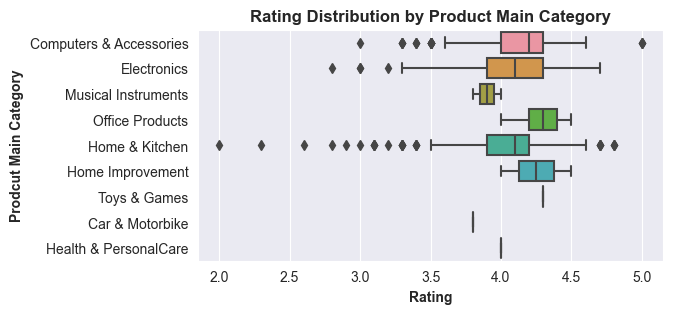

In [61]:
#Rating Distribution by Product Main Category

fig, ax = plt.subplots(figsize = ( 6 , 3 ))

sns.boxplot(ax =ax ,data = df1 , x = 'rating' , y = 'category_1')

ax.set_title("Rating Distribution by Product Main Category" , fontweight = 'bold')
ax.set_xlabel("Rating" , fontweight = 'bold')
ax.set_ylabel("Prodcut Main Category" , fontweight = 'bold')

plt.show()


**Toys & Games, Car & Motorbike, and Health & Personal** Care product ratings's are around **3.75 - 4.375**. **All Home Improvement, and Office Products** have a minimal **rating of 4.0**.

Many of the **Computer & Accessories, and Electronics** products have ratings in the range of **3.6 - 4.6**. Though these categories do have products that have a **high rating such as 5.0** and **low rating, going down to 2.75**.

Noticeably, the **Home & Kitchen products** have a really widespread rating going to as **high as 4.75 and going as low as 2.0 rating**, which is the **lowest rating** out of all the products in this dataset. However, most of the products in this category fall in the **range of around 3.8 - 4.6**.

In [62]:
#Rating of Products based on Rating Category

rate_cat = df1.groupby(['category_1' , 'rating_score']).agg('count').iloc[:,1].rename_axis().reset_index(name = 'Count')

rate_cat = rate_cat.rename(columns = {'category_1':'Main Category' , 'rating_score':'Rating Category'})

rate_cat

,Main Category,Rating Category,Count
0,Car & Motorbike,Below Average,0
1,Car & Motorbike,Average,1
2,Car & Motorbike,Above Average,0
3,Car & Motorbike,Excellent,0
4,Computers & Accessories,Below Average,0
5,Computers & Accessories,Average,75
6,Computers & Accessories,Above Average,375
7,Computers & Accessories,Excellent,3
8,Electronics,Below Average,1
9,Electronics,Average,132


Above is the list of the amount of products under specific ratings for each main category.

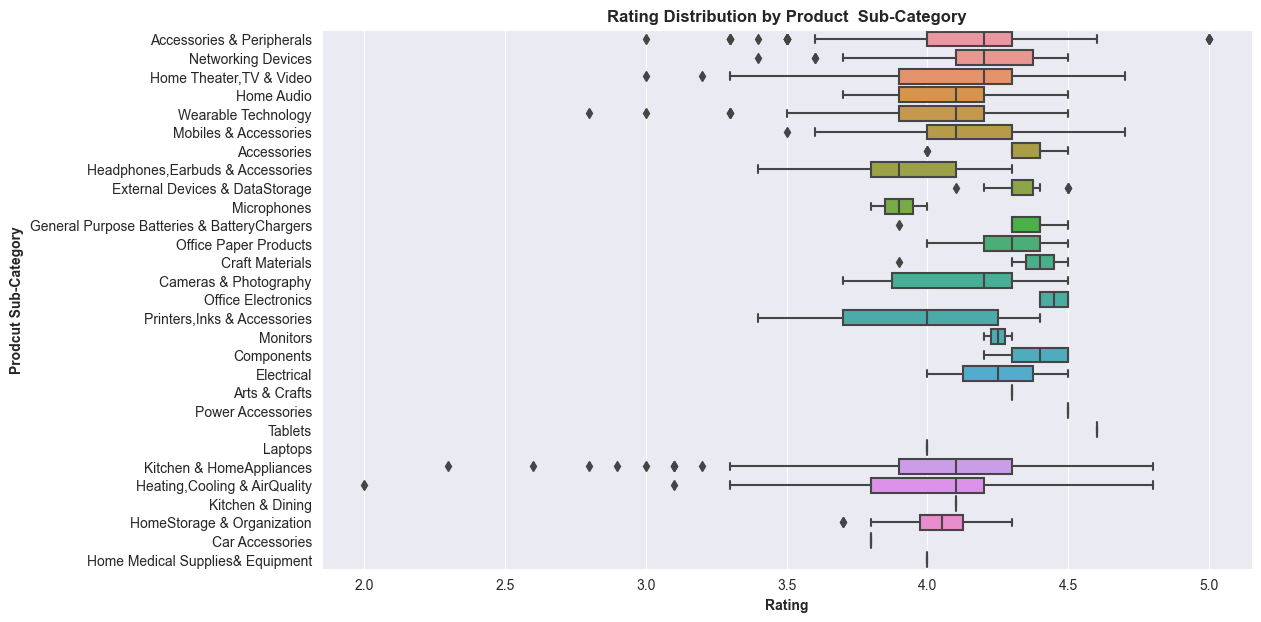

In [63]:
#Rating Distribution by Product Sub-Category

fig, ax = plt.subplots(figsize = (12,7 ))

sns.boxplot(ax = ax ,data = df1 , x = 'rating' , y = 'category_2')

ax.set_title("Rating Distribution by Product  Sub-Category" , fontweight = 'bold')
ax.set_xlabel("Rating" , fontweight = 'bold')
ax.set_ylabel("Prodcut Sub-Category" , fontweight = 'bold')

plt.show()


In the Rating Distribution by Product Sub-Category graph, I have noticed that the **highest rated product** comes from the sub category of **Accessories & Peripherals**. The **lowest rated product** comes from the sub category of **Heating, Cooling & Air Quality**.

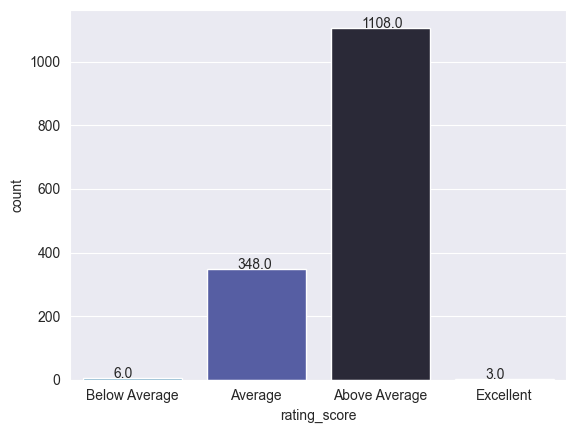

In [64]:
#Rating of All products

rat_prod = sns.countplot(data = df1 , x = 'rating_score' )

for p in rat_prod.patches:
    rat_prod.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Most of the products in this dataset have been rated **Above Average**. There are extremely few products that are rated Below Average and Excellent. **No products are rated as Poor in this dataset**.

In [65]:
#Rating Pivot table

def p25(x):
    return np.percentile(x,25)

def p75(x):
    return np.percentile(x,75)

rating_pivot = df1.pivot_table(index = ['category_1' , 'category_2'] , values = ['rating' , 'rating_count'] ,
                                    aggfunc = ([p25 ,np.median , np.mean , p75]))

#Just renaming column names nothing's special...
rating_pivot = rating_pivot.rename(columns = {'rating':'Rating', 'rating_count':'Rating Count' ,'median':'Median' , 'mean':'Mean'})

rating_pivot

p25  \
                                                                    Rating   
category_1              category_2                                           
Car & Motorbike         Car Accessories                              3.800   
Computers & Accessories Accessories & Peripherals                    4.000   
                        Components                                   4.300   
                        External Devices & DataStorage               4.300   
                        Laptops                                      4.000   
                        Monitors                                     4.225   
                        Networking Devices                           4.100   
                        Printers,Inks & Accessories                  3.700   
                        Tablets                                      4.600   
Electronics             Accessories                                  4.300   
                        Cameras & Photography                        3.875   
                        General Purpose Batteries & BatteryChargers  4.300   
                        Headphones,Earbuds & Accessories             3.800   
                        Home Audio                                   3.900   
                        Home Theater,TV & Video                      3.900   
                        Mobiles & Accessories                        4.000   
                        Power Accessories                            4.500   
                        Wearable Technology                          3.900   
Health & PersonalCare   Home Medical Supplies& Equipment             4.000   
Home & Kitchen          Craft Materials                              4.350   
                        Heating,Cooling & AirQuality                 3.800   
                        HomeStorage & Organization                   3.975   
                        Kitchen & Dining                             4.100   
                        Kitchen & HomeAppliances                     3.900   
Home Improvement        Electrical                                   4.125   
Musical Instruments     Microphones                                  3.850   
Office Products         Office Electronics                           4.400   
                        Office Paper Products                        4.200   
Toys & Games            Arts & Crafts                                4.300   

                                                                                  \
                                                                    Rating Count   
category_1              category_2                                                 
Car & Motorbike         Car Accessories                                  1118.00   
Computers & Accessories Accessories & Peripherals                            NaN   
                        Components                                       2515.00   
                        External Devices & DataStorage                  19747.50   
                        Laptops                                           323.00   
                        Monitors                                         2166.25   
                        Networking Devices                              10281.75   
                        Printers,Inks & Accessories                      3435.50   
                        Tablets                                          2886.00   
Electronics             Accessories                                     67259.00   
                        Cameras & Photography                            5384.25   
                        General Purpose Batteries & BatteryChargers      1269.50   
                        Headphones,Earbuds & Accessories                 9881.75   
                        Home Audio                                       2625.75   
                        Home Theater,TV & Video                           426.50   
                        Mobiles & Accessories                 

.

Above is the specific data on **ratings and the amount of rating** for each **Main and Sub Category of Products** from the dataset.

### Observation 3: Reviewers

In [66]:
df2.head()

,user_id,user_name
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh


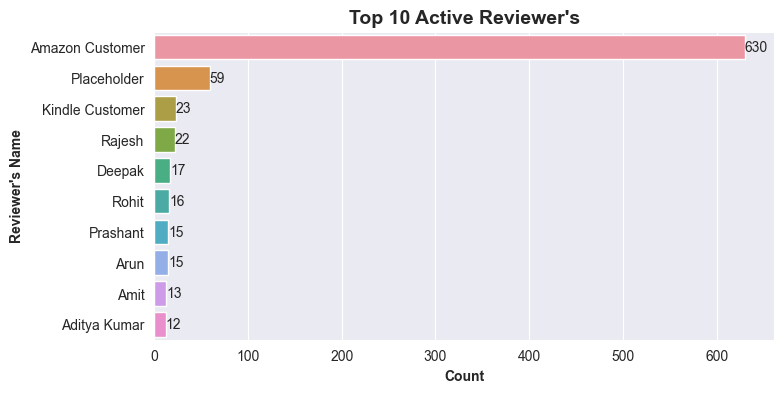

In [67]:
#Top 10 Reviewers who gave ratings and reviews for more than one product

fig  = plt.subplots(figsize = (8,4))

#this is the frequency table
top_reviewers = df2['user_name'].value_counts().head(10).rename_axis('User Name').reset_index(name = "Count")

#Used above frequency table to create bar plot
top_reviewers_plot = sns.barplot(data = top_reviewers , x = 'Count' , y = 'User Name')

#setting title and axis lables
top_reviewers_plot.set_title("Top 10 Active Reviewer's" , fontweight = 'bold' , size = 14)
top_reviewers_plot.set_xlabel("Count" , fontweight = 'bold')
top_reviewers_plot.set_ylabel("Reviewer's Name" , fontweight = 'bold')

#setting data bar lables
top_reviewers_plot.bar_label(top_reviewers_plot.containers[0])

plt.show()

We can see that there are more than **500 people who reviewed a product** and give rating anonymously under the alias of **Amazon Customer.**

There are **more than 8 people** who have given ratings and reviews to **more than 10 products on this dataset**.

## Observation 4: Product Pricing

* Actual Price & Discounted Price Distribution
* Discount Percentage Distribution
* Specific Details about the Discount Percentage
* The Discount Range by Product Main Category
* The Discount Range by Product Sub-Category
* Actual Price Range and Discounted Price Range by Product Main Category
* Actual Price Range and Discounted Price Range by Product Sub Category
* Pivot table of Prices

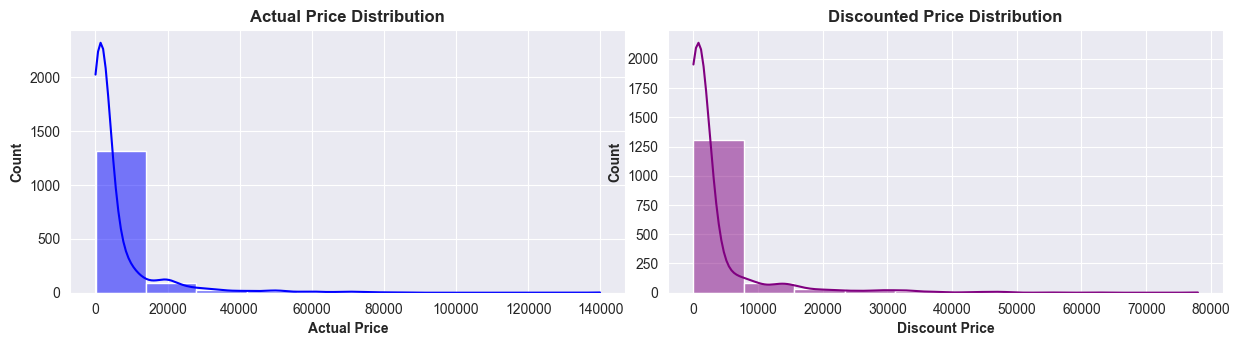

In [68]:
#Actual Price & Discounted Price Distribution

fig ,ax = plt.subplots(1 ,2 , figsize = (12,3))

#fig.suptitle("Actual Price & Discounted Price Distribution" , fontweight = 'heavy' , size = 'xx-large')

fig.tight_layout(pad = 0.3)

sns.histplot(ax = ax[0],data = df1 , x = 'actual_price' , bins= 10 , kde = True , color = 'blue')

ax[0].set_title('Actual Price Distribution' , fontweight = 'bold')
ax[0].set_xlabel('Actual Price' , fontweight = 'bold')
ax[0].set_ylabel('Count' , fontweight = 'bold')

sns.histplot(ax = ax[1],data = df1 , x = 'discounted_price' , bins= 10 , kde = True , color = 'purple')

ax[1].set_title('Discounted Price Distribution' , fontweight = 'bold')
ax[1].set_xlabel('Discount Price' , fontweight = 'bold')
ax[1].set_ylabel('Count' , fontweight = 'bold')

plt.show()

Both graphs show the same distribution which is **Right or Positvely Skewed**.

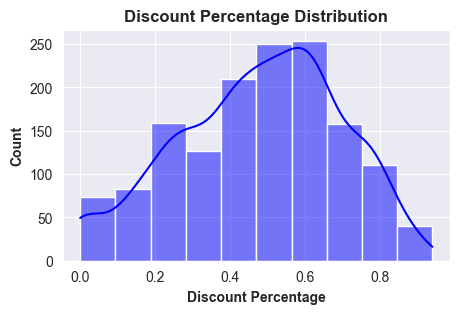

In [69]:
#Discount Percentage Distribution

fig ,ax = plt.subplots(figsize = (5,3))

sns.histplot(data = df1 , x = 'discount_percentage' ,bins = 10, kde = True , color = 'blue')

ax.set_title('Discount Percentage Distribution' , fontweight = 'bold')
ax.set_xlabel('Discount Percentage' , fontweight = 'bold')
ax.set_ylabel('Count' , fontweight = 'bold')

plt.show()

Most products on the dataset have discounts at around **50% - 70%.**

In [70]:
#Specific Details about the Discount Percentage

ds_disc_percentage = df1['discount_percentage'].describe()
print(ds_disc_percentage)


count    1465.000000
mean        0.476915
std         0.216359
min         0.000000
25%         0.320000
50%         0.500000
75%         0.630000
max         0.940000
Name: discount_percentage, dtype: float64


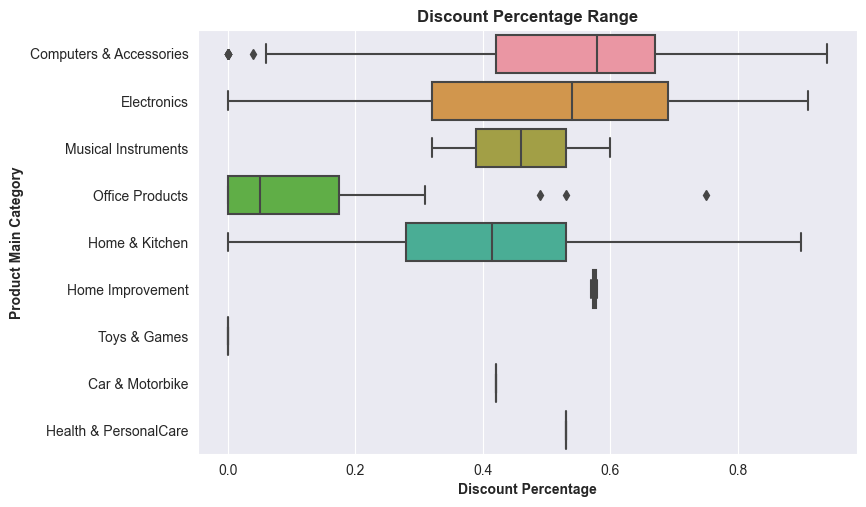

In [71]:
#The Discount Percentage Range by Product Main Category

fig ,ax = plt.subplots(figsize = (8.5,5.5))

sns.boxplot(data = df1 , x = 'discount_percentage' , y = 'category_1')

ax.set_title('Discount Percentage Range' , fontweight = 'bold')
ax.set_xlabel('Discount Percentage' , fontweight = 'bold')
ax.set_ylabel('Product Main Category' , fontweight = 'bold')

plt.show()

**Computers & Accessories, Electronics and Home & Kitchen** products have a large spread of discount variation ranging a minimal of **0% to more than 90% discount**.

**Toys & Games, Cars & Motorbikes, Health & Personal Care, and Home Improvement** have the **least spread of discount variation**.

**Office Products does not give a large amount of discount** compared to other products in the Main Category.

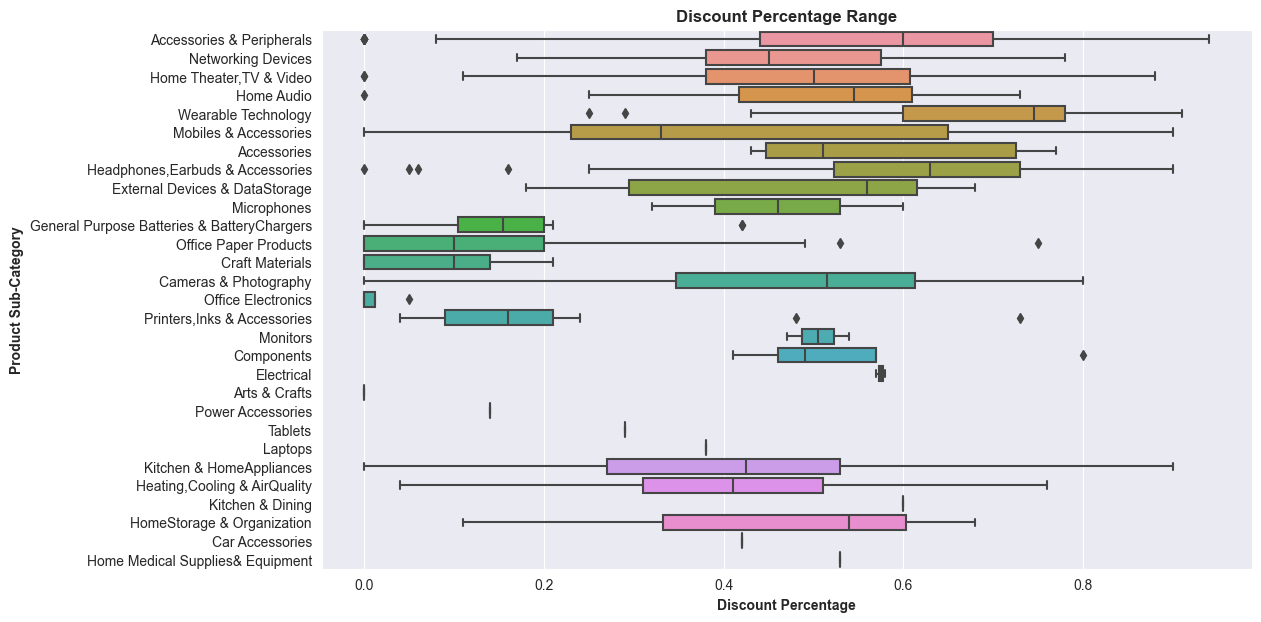

In [72]:
#The Discount Percentage Range by Product Sub-Category

fig ,ax = plt.subplots(figsize = (12,7))

sns.boxplot(data = df1 , x = 'discount_percentage' , y = 'category_2')

ax.set_title('Discount Percentage Range' , fontweight = 'bold')
ax.set_xlabel('Discount Percentage' , fontweight = 'bold')
ax.set_ylabel('Product Sub-Category' , fontweight = 'bold')

plt.show()

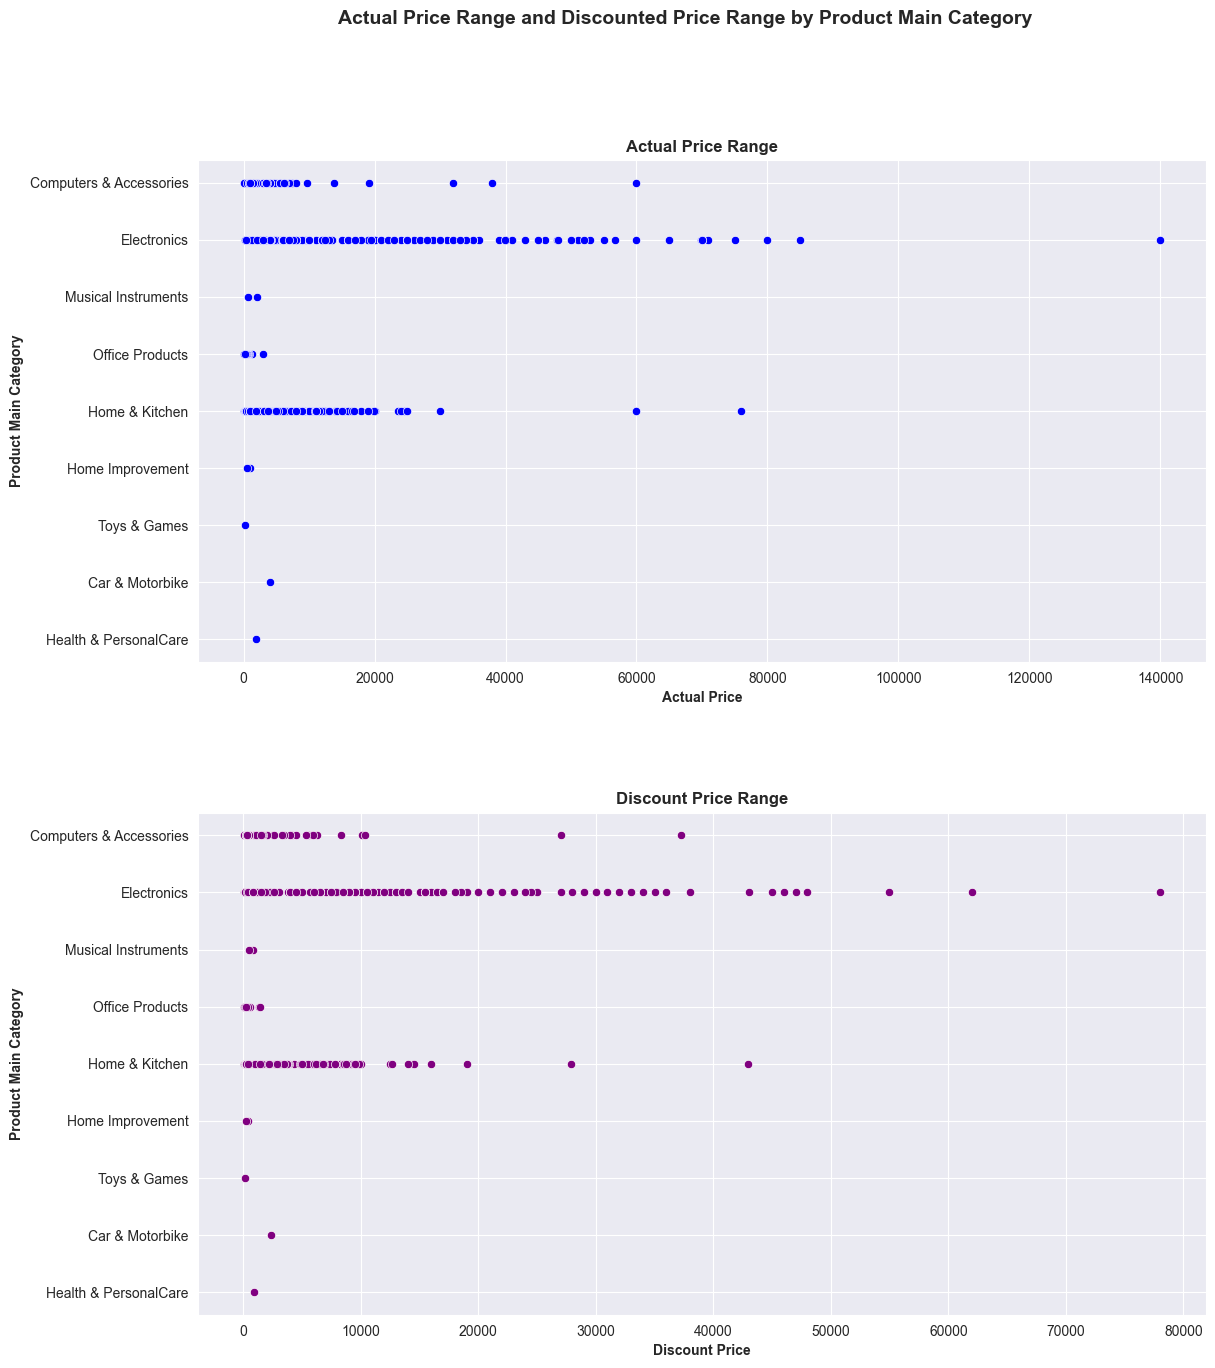

In [73]:
#Actual Price Range and Discounted Price Range by Product Main Category

fig ,ax = plt.subplots(2 , 1, figsize = (13,15))
fig.suptitle('Actual Price Range and Discounted Price Range by Product Main Category', fontweight='heavy' ,size = 14 )

sns.scatterplot(ax = ax[0] , data = df1 , x = 'actual_price' , y = 'category_1' , color = 'blue')

ax[0].set_title('Actual Price Range' , fontweight = 'bold')
ax[0].set_xlabel('Actual Price' , fontweight = 'bold')
ax[0].set_ylabel('Product Main Category' , fontweight = 'bold')

#Making horizontal space between plots
plt.subplots_adjust(hspace = 0.3)

sns.scatterplot(ax = ax[1] , data = df1 , x = 'discounted_price' , y = 'category_1' , color = 'purple')

ax[1].set_title('Discount Price Range' , fontweight = 'bold')
ax[1].set_xlabel('Discount Price' , fontweight = 'bold')
ax[1].set_ylabel('Product Main Category' , fontweight = 'bold')

plt.show()

There is a **significant decrease in price after discount** especially in the **Electronics Category**. Most of the **product's actual price falls below 20,000 Rupee**. For the discounted price, most of the **products fall under 10,000 Rupee.**

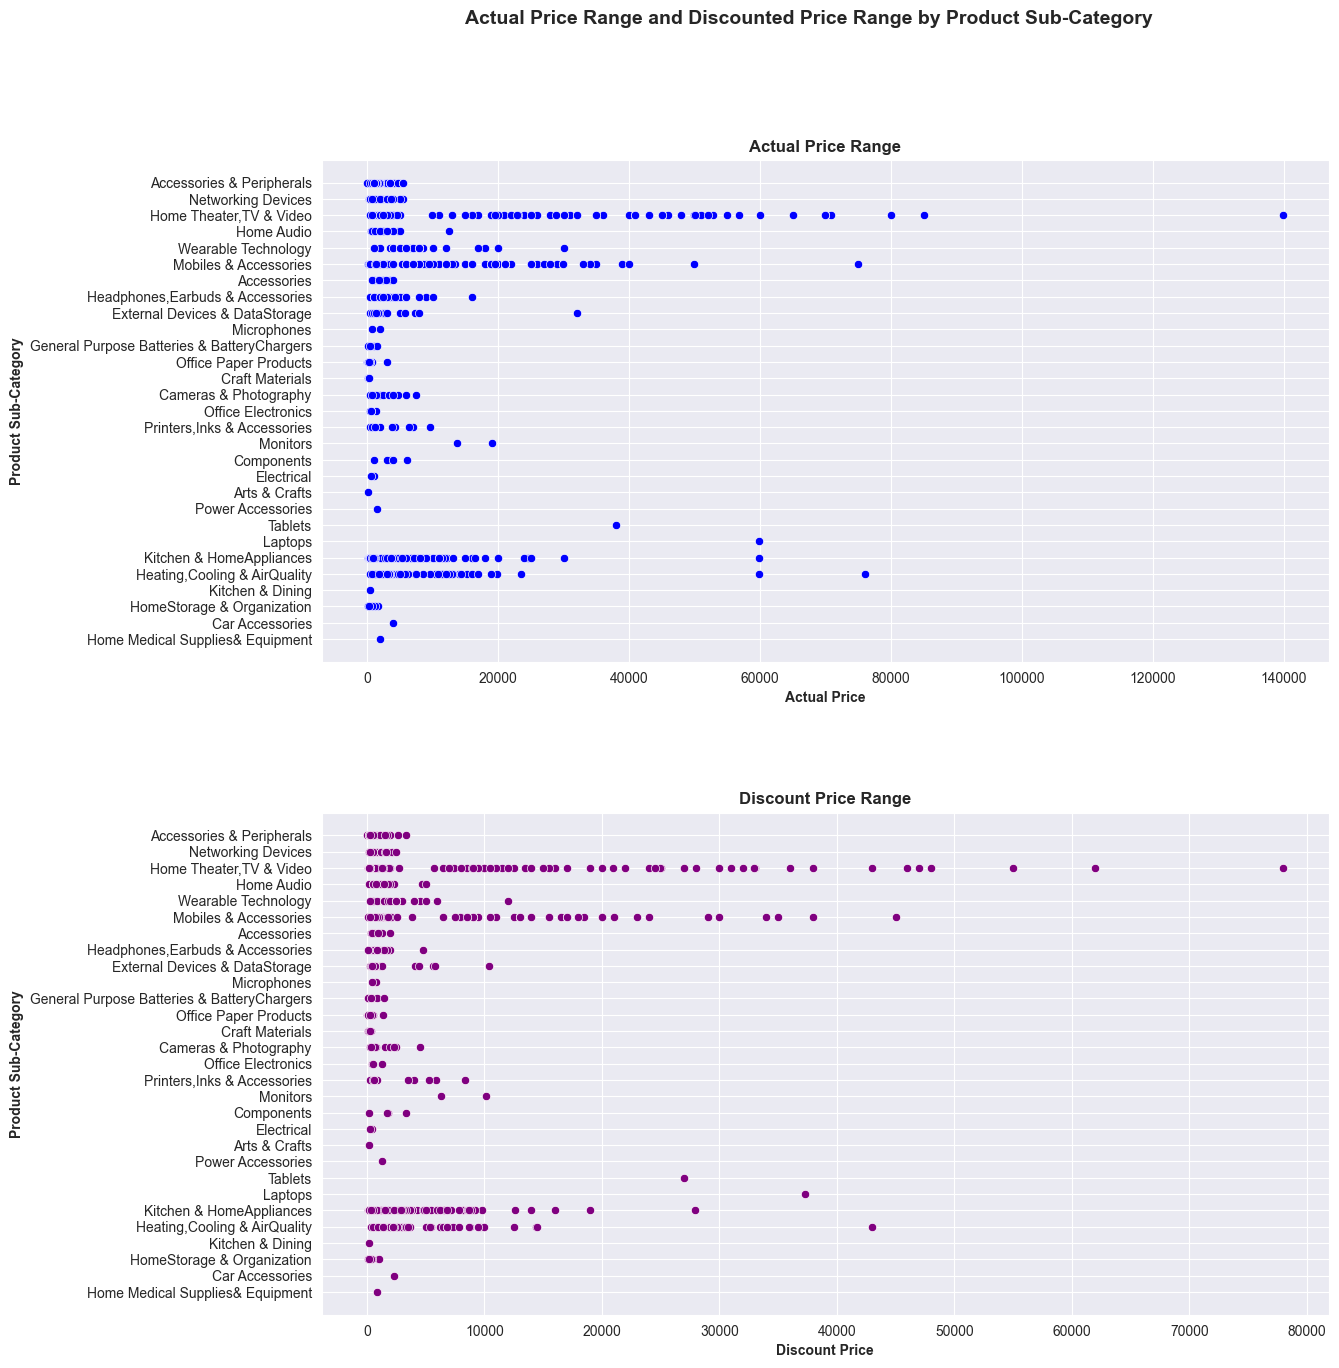

In [74]:
#Actual Price Range and Discounted Price Range by Product Sub Category

fig ,ax = plt.subplots(2 , 1, figsize = (13,15))
fig.suptitle('Actual Price Range and Discounted Price Range by Product Sub-Category', fontweight='heavy' ,size = 14 )

sns.scatterplot(ax = ax[0] , data = df1 , x = 'actual_price' , y = 'category_2' , color = 'blue')

ax[0].set_title('Actual Price Range' , fontweight = 'bold')
ax[0].set_xlabel('Actual Price' , fontweight = 'bold')
ax[0].set_ylabel('Product Sub-Category' , fontweight = 'bold')

#Making horizontal space between plots
plt.subplots_adjust(hspace = 0.3)

sns.scatterplot(ax = ax[1] , data = df1 , x = 'discounted_price' , y = 'category_2' , color = 'purple')

ax[1].set_title('Discount Price Range' , fontweight = 'bold')
ax[1].set_xlabel('Discount Price' , fontweight = 'bold')
ax[1].set_ylabel('Product Sub-Category' , fontweight = 'bold')

plt.show()

There is a significant decrease in price after discount especially in the **Home theater,TV & Video and Mobile & Accessories**. Most of the product's actual price falls below 20,000 Rupee. For the discounted price, most of the products fall under 10,000 Rupee.

In [75]:
#Pivot table of Prices

def p25(x):
    return np.percentile(x,25)

def p75(x):
    return np.percentile(x,75)

actual_price_pivot = df1.pivot_table(index = ['category_1' , 'category_2'] , values = ['actual_price' , 'discounted_price'] ,
                                    aggfunc = ([p25 ,np.median , np.mean , p75]))

#Just renaming column names nothing's special...
actual_price_pivot = actual_price_pivot.rename(columns = {'median':'Median' , 'mean':'Mean'})

actual_price_pivot

p25  \
                                                                    actual_price   
category_1              category_2                                                 
Car & Motorbike         Car Accessories                                  4000.00   
Computers & Accessories Accessories & Peripherals                         499.00   
                        Components                                       3100.00   
                        External Devices & DataStorage                   1074.25   
                        Laptops                                         59890.00   
                        Monitors                                        15090.00   
                        Networking Devices                               1208.00   
                        Printers,Inks & Accessories                       811.00   
                        Tablets                                         37999.00   
Electronics             Accessories                                      1150.00   
                        Cameras & Photography                             946.00   
                        General Purpose Batteries & BatteryChargers       205.00   
                        Headphones,Earbuds & Accessories                  999.00   
                        Home Audio                                       1274.00   
                        Home Theater,TV & Video                           824.00   
                        Mobiles & Accessories                            1299.00   
                        Power Accessories                                1499.00   
                        Wearable Technology                              5999.00   
Health & PersonalCare   Home Medical Supplies& Equipment                 1900.00   
Home & Kitchen          Craft Materials                                   132.50   
                        Heating,Cooling & AirQuality                     1990.00   
                        HomeStorage & Organization                        374.00   
                        Kitchen & Dining                                  495.00   
                        Kitchen & HomeAppliances                         1000.00   
Home Improvement        Electrical                                        699.00   
Musical Instruments     Microphones                                      1023.00   
Office Products         Office Electronics                                511.25   
                        Office Paper Products                             120.00   
Toys & Games            Arts & Crafts                                     150.00   

                                                                                      \
                                                                    discounted_price   
category_1              category_2                                                     
Car & Motorbike         Car Accessories                                      2339.00   
Computers & Accessories Accessories & Peripherals                             199.00   
                        Components                                           1709.00   
                        External Devices & DataStorage                        504.00   
                        Laptops                                             37247.00   
                        Monitors                                             7249.00   
                        Networking Devices                                    530.00   
                        Printers,Inks & Accessories                           597.00   
                        Tablets                                             26999.00   
Electronics             Accessories                                           479.00   
                        Cameras & Photography                                 386.50   
                        General Purpose Batteries & BatteryChargers           166.75   
                        Headphones,Earbuds & Accessories            

category_1 refers to the Main Category

category_2 refers to the Sub-Category

Above is the specific data on **actual price and discounted price** for each **Main and Sub Category of Products** from the dataset.

### EDA Report :

#### Data Preprocessing

their is no duplicate records this dataset.

Encountered with **unusual string '|' in the rating feature**, Before replacing this string first inspected this product.
So I went to amazon page to find out is their any rating regarding this product with **product_id B08L12N5H1** and **found out that it has rating of 4.0**.
So **I gave the item rating of 4.0**.

Created rating score feature having categories for Rankings and price difference feature.



* Changed Data Types of Columns from object to Floats
* Filled in Missing Information
* Checked For Duplicate Rows
* Splitted Long Strings
* Created Various New Columns

#### Exploratory Data Analysis

* Product Category and Sub-Category
* Correlation between features
* Product Rating 
* Analysed Reviewer's name
* Product Pricing analysed

Created **Pivot Table** that counts most occuring subcategory with respect to their main category.

Electronics,Computers & Accessories especially acccessories & peripherals and kitchen & home appliances covers most of the products in this dataset. In general, this dataset contains mostly products closely related to **electric devices.**

actual prices of products and discounted prices of products have a **Positive correlation**.

Most of the product **rating range around 4.0 - 4.375** with **no products under the score of 2.0**. The rating distribution is slightly left-skewed or we can say that **negative skewed distribution**.

The amount of ratings given to a product is very widespread. Most of the products that have been rated, have **around 0 - 5000 amount of rating for each product**. Interestingly there are products that have more than 40,000 ratings. The amount of ratings distribution is **highly right skewed**.

I have noticed that the **highest rated product comes from the sub category of Accessories & Peripherals**. The **lowest rated product comes from the sub category of Heating, Cooling & Air Quality**.

Most of the products in this dataset have been rated Above Average. There are extremely few products that are rated Below Average and Excellent. **No products are rated as Poor in this dataset.**

**more than 500 people** who reviewed a product and give rating anonymously under the alias of **Amazon Customer**.

Most products on the dataset have **discounts** at around **50% - 70%.**

Computers & Accessories, Electronics and Home & Kitchen products have a large spread of discount variation ranging a minimal of **0% to more than 90%** discount.
Toys & Games, Cars & Motorbikes, Health & Personal Care, and Home Improvement have the least spread of discount variation.
Office Products does not give a large amount of discount compared to other products in the Main Category.

There is a significant decrease in price after discount especially in the **Electronics Category**. Most of the product's actual price falls **below 20,000 Rupee**. For the discounted price, most of the products **fall under 10,000 Rupee.**

There is a significant **decrease in price** after discount especially in the **Home theater,TV & Video and Mobile & Accessories**.